# Working with Unlabeled Data - Clustering Analysis

## Grouping objects by similarity using k-means

In [1]:
from sklearn.datasets import make_blobs

In [2]:
X, y = make_blobs(
    n_samples=150,
    n_features=2,
    centers=3,
    cluster_std=0.5,
    shuffle=True,
    random_state=0
)

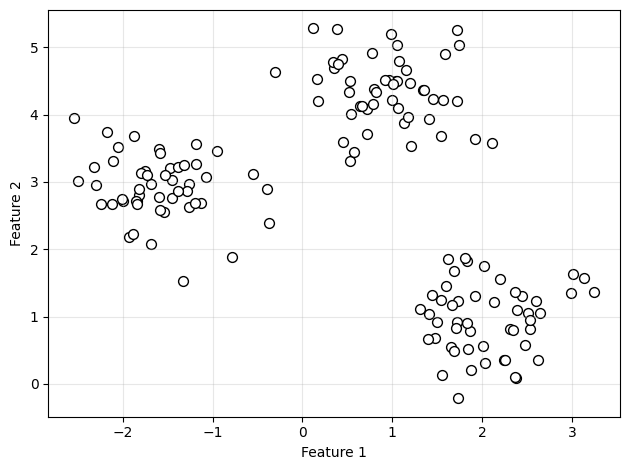

In [3]:
import matplotlib.pyplot as plt

plt.scatter(
    X[:, 0],
    X[:, 1],
    c='white',
    marker='o',
    edgecolors='black',
    s=50
)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.grid(True, alpha=.3)
plt.tight_layout()
plt.show()

In [4]:
from sklearn.cluster import KMeans

km_model = KMeans(
    n_clusters=3,
    init='random',
    n_init=10,
    max_iter=300,
    tol=1e-4,
    random_state=0
)

y_km = km_model.fit_predict(X)

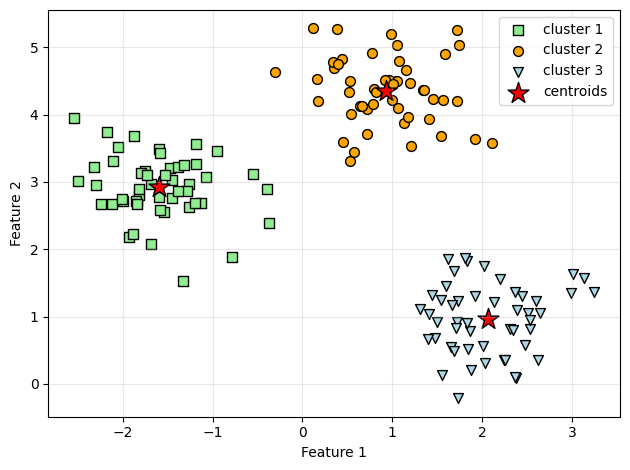

In [5]:
plt.scatter(
    X[y_km == 0, 0],
    X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s',
    edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0],
    X[y_km == 1, 1],
    s=50, c='orange',
    marker='o',
    edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 2, 0],
    X[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v',
    edgecolor='black',
    label='cluster 3'
)

plt.scatter(
    km_model.cluster_centers_[:, 0],
    km_model.cluster_centers_[:, 1],
    s=250,
    marker='*',
    c='red',
    edgecolor='black',
    label='centroids'
)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, alpha=.3)
plt.tight_layout()
plt.show()

## Using the elbow method to find the optimal number of clusters

In [6]:
distortions = []

for i in range(1,11):
    km = KMeans(
        n_clusters=i,
        init='k-means++',
        n_init=10,
        max_iter=300,
        random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

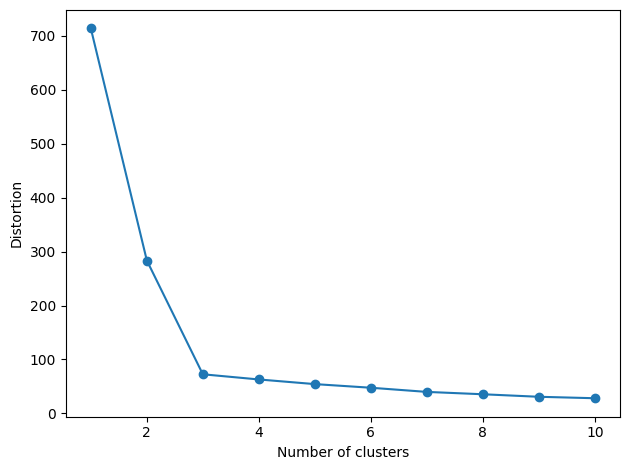

In [7]:
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Distortion")
plt.tight_layout()
plt.show()

## Quantifying the quality of clustering via silhouette plots

In [8]:
km_model = KMeans(
    n_clusters=3,
    init="k-means++",
    n_init=10,
    max_iter=300,
    tol=1e-4,
    random_state=0
)

y_km = km_model.fit_predict(X)

## Organizing clusters as a hierarchical tree

In [9]:
import pandas as pd
import numpy as np

In [10]:
np.random.seed(123)
variables = ['X', 'Y', 'Z']
labels=['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']

X = np.random.random_sample([5, 3])*10

df = pd.DataFrame(X, columns=variables, index=labels)

In [11]:
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


### 1) Performing hierarchical clustering on a distance matrix

In [12]:
from scipy.spatial.distance import pdist, squareform

In [13]:
row_dist = pd.DataFrame(
    squareform(
        pdist(df, metric="euclidean")
    ),
    columns=labels, index=labels
)

In [14]:
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


In [15]:
from scipy.cluster.hierarchy import linkage

In [16]:
help(linkage)

Help on function linkage in module scipy.cluster.hierarchy:

linkage(y, method='single', metric='euclidean', optimal_ordering=False)
    Perform hierarchical/agglomerative clustering.

    The input y may be either a 1-D condensed distance matrix
    or a 2-D array of observation vectors.

    If y is a 1-D condensed distance matrix,
    then y must be a :math:`\binom{n}{2}` sized
    vector, where n is the number of original observations paired
    in the distance matrix. The behavior of this function is very
    similar to the MATLAB linkage function.

    A :math:`(n-1)` by 4 matrix ``Z`` is returned. At the
    :math:`i`-th iteration, clusters with indices ``Z[i, 0]`` and
    ``Z[i, 1]`` are combined to form cluster :math:`n + i`. A
    cluster with an index less than :math:`n` corresponds to one of
    the :math:`n` original observations. The distance between
    clusters ``Z[i, 0]`` and ``Z[i, 1]`` is given by ``Z[i, 2]``. The
    fourth value ``Z[i, 3]`` represents the number of

In [17]:
row_clusters = linkage(
    df.values,
    method="complete",
    metric="euclidean"
)

In [18]:
pd.DataFrame(
    row_clusters,
    columns=['row label 1', 'row label 2', 'distance', 'no. of items in clust.'],
    index=[f'cluster {(i+1)}' for i in range(row_clusters.shape[0])]
)

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


In [19]:
from scipy.cluster.hierarchy import dendrogram

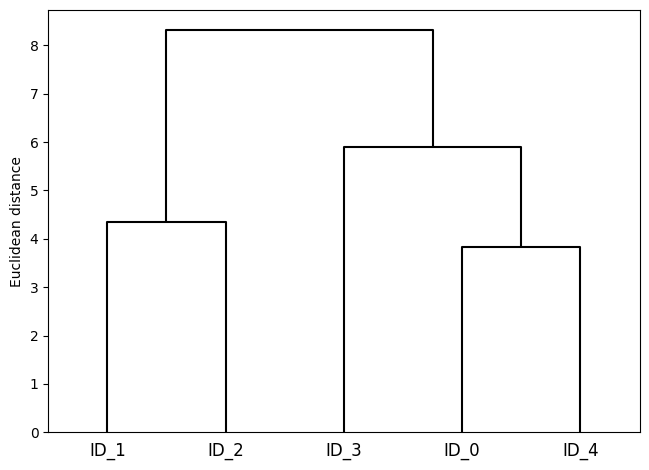

In [20]:
from scipy.cluster.hierarchy import set_link_color_palette
set_link_color_palette(['black'])

row_dendr = dendrogram(
    row_clusters,
    labels=labels,
    color_threshold=np.inf
)

plt.tight_layout()
plt.ylabel("Euclidean distance")
plt.show()

### 3) Attaching dendrograms to a heat map

C:\Users\francisco.procopio\AppData\Local\Temp\ipykernel_2072\2279440047.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axm.set_xticklabels([''] + list(df_rowclust.columns))
C:\Users\francisco.procopio\AppData\Local\Temp\ipykernel_2072\2279440047.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axm.set_yticklabels([''] + list(df_rowclust.index))


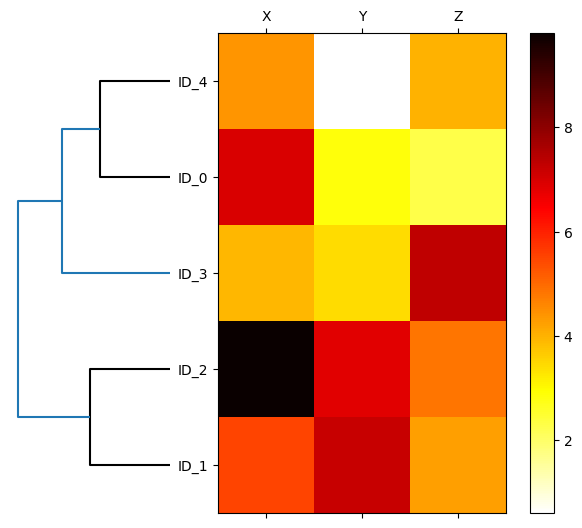

In [21]:
fig = plt.figure(figsize=(8,8), facecolor='white')
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])
row_dendr = dendrogram(
    row_clusters,
    orientation='left'
)

df_rowclust = df.iloc[row_dendr['leaves'][::-1]]

axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])
cax = axm.matshow(
    df_rowclust,
    interpolation='nearest',
    cmap='hot_r'
)

axd.set_xticks([])
axd.set_yticks([])

for i in axd.spines.values():
    i.set_visible(False)
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))

plt.show()

### 3) Applying agglomerative clustering via scikit-learn

In [28]:
from sklearn.cluster import AgglomerativeClustering

ac_model = AgglomerativeClustering(
    n_clusters=3,
    metric='euclidean',
    linkage='complete'
)

labels = ac_model.fit_predict(X)
print(f'Cluster labels: {labels}')

Cluster labels: [1 0 0 2 1]


In [29]:
ac_model = AgglomerativeClustering(
    n_clusters=2,
    metric='euclidean',
    linkage='complete'
)

labels = ac_model.fit_predict(X)
print(f'Cluster labels: {labels}')

Cluster labels: [0 1 1 0 0]


### 4) Locating regions of high density via DBSCAN

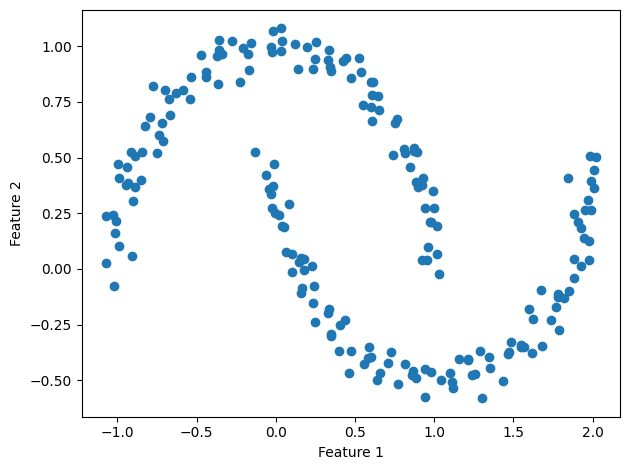

In [30]:
from sklearn.datasets import make_moons

X, y = make_moons(
    n_samples=200,
    noise=0.05,
    random_state=0
)

plt.scatter(X[:,0], X[:,1])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.tight_layout()
plt.show()

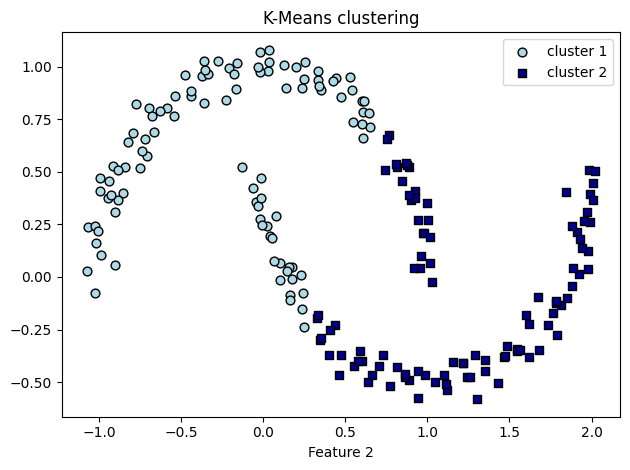

In [37]:
# Testing KMeans
km_model = KMeans(
    n_clusters=2,
    random_state=0
)

y_km = km_model.fit_predict(X)

plt.scatter(
    X[y_km==0, 0],
    X[y_km==0, 1],
    c='lightblue',
    edgecolor='black',
    marker='o',
    s=40,
    label='cluster 1'
)

plt.scatter(
    X[y_km==1, 0],
    X[y_km==1, 1],
    c='darkblue',
    edgecolor='black',
    marker='s',
    s=40,
    label='cluster 2'
)

plt.title("K-Means clustering")
plt.xlabel("Feature 1")
plt.xlabel("Feature 2")

plt.legend()
plt.tight_layout()
plt.show()

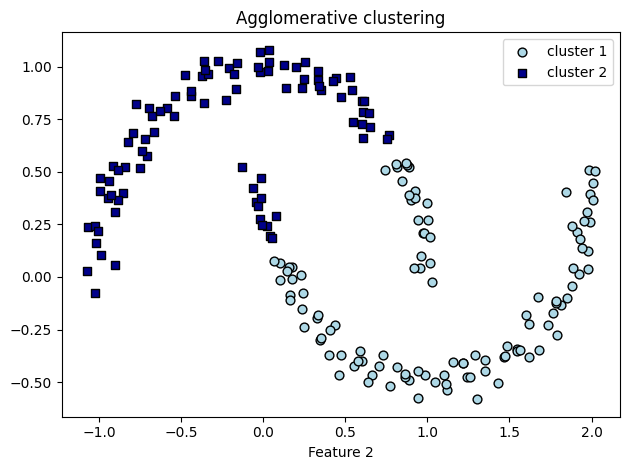

In [38]:
# Testing agglomerative clustering
ac_model = AgglomerativeClustering(
    n_clusters=2,
    metric='euclidean',
    linkage='complete'
)

y_ac = ac_model.fit_predict(X)

plt.scatter(
    X[y_ac==0, 0],
    X[y_ac==0, 1],
    c='lightblue',
    edgecolor='black',
    marker='o',
    s=40,
    label='cluster 1'
)

plt.scatter(
    X[y_ac==1, 0],
    X[y_ac==1, 1],
    c='darkblue',
    edgecolor='black',
    marker='s',
    s=40,
    label='cluster 2'
)

plt.title("Agglomerative clustering")
plt.xlabel("Feature 1")
plt.xlabel("Feature 2")

plt.legend()
plt.tight_layout()
plt.show()

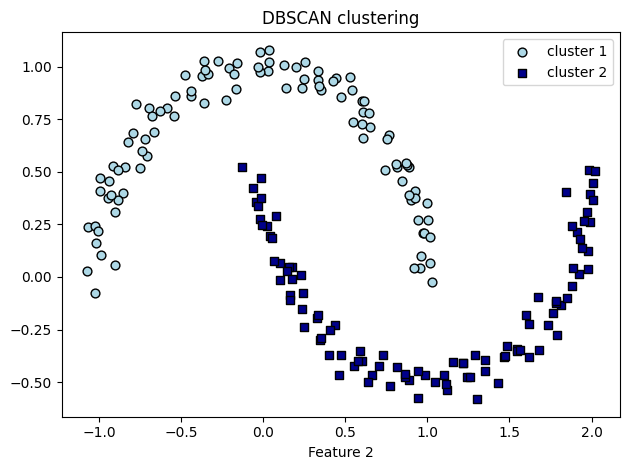

In [39]:
# Testing DBSCAN clustering
from sklearn.cluster import DBSCAN

db_model = DBSCAN(
    eps=0.2,
    min_samples=5,
    metric='euclidean'
)

y_db = db_model.fit_predict(X)

plt.scatter(
    X[y_db==0, 0],
    X[y_db==0, 1],
    c='lightblue',
    edgecolor='black',
    marker='o',
    s=40,
    label='cluster 1'
)

plt.scatter(
    X[y_db==1, 0],
    X[y_db==1, 1],
    c='darkblue',
    edgecolor='black',
    marker='s',
    s=40,
    label='cluster 2'
)

plt.title("DBSCAN clustering")
plt.xlabel("Feature 1")
plt.xlabel("Feature 2")

plt.legend()
plt.tight_layout()
plt.show()